# 13.2.4.4a Ejemplo: MLP para regresión (tarea)

**Auto MPG:** $\;$ predicción de consumo en ciudad de un vehículo en miles per gallon (MPG)

**Fuente:**  $\;$ [https://archive.ics.uci.edu/static/public/9/auto+mpg.zip](https://archive.ics.uci.edu/static/public/9/auto+mpg.zip)

In [1]:
import numpy as np; import pandas as pd
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names, na_values={'horsepower': '?'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [2]:
data.drop('car_name', axis=1, inplace=True) # no usamos car_name para predecir
data.dropna(inplace=True) # eliminamos los seis casos sin horsepower 
data = data.astype({'cylinders': np.float64, 'model_year': np.float64, 'origin': 'category'})
data['origin'] = data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,USA
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,Europe
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,USA
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,USA


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    float64 
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model_year    392 non-null    float64 
 7   origin        392 non-null    category
dtypes: category(1), float64(7)
memory usage: 25.0 KB


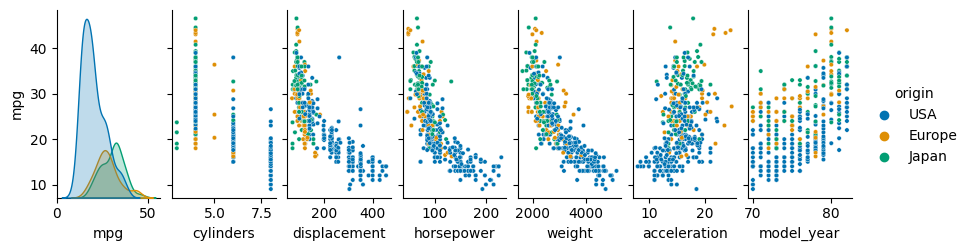

In [4]:
import warnings; warnings.filterwarnings('ignore'); import seaborn as sns
sns.pairplot(data, y_vars='mpg', hue="origin", aspect=.5, palette='colorblind', plot_kws=dict(marker="o", s=10));